In [ ]:
pip install sastrawi wordcloud seaborn matplotlib scikit-learn pandas

In [ ]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load dataset
df = pd.read_csv("GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv")
df = df.dropna(subset=['content'])  # Hapus baris kosong

# Labeling sentimen
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    elif score == 3:
        return 'netral'
    else:
        return 'positif'

df['label'] = df['score'].apply(label_sentiment)

In [ ]:
# Stopword Bahasa Indonesia
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())

# Fungsi preprocessing teks
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    filtered = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered)

# Terapkan pembersihan teks
df['clean_content'] = df['content'].apply(clean_text)

In [ ]:
# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(df['clean_content'], df['label'], test_size=0.2, random_state=42)

# Pipeline: TF-IDF + Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Latih model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Classification Report ===
               precision    recall  f1-score   support

     negatif       0.75      0.87      0.81     10870
      netral       0.00      0.00      0.00      1855
     positif       0.94      0.94      0.94     32275

    accuracy                           0.88     45000
   macro avg       0.56      0.60      0.58     45000
weighted avg       0.85      0.88      0.87     45000



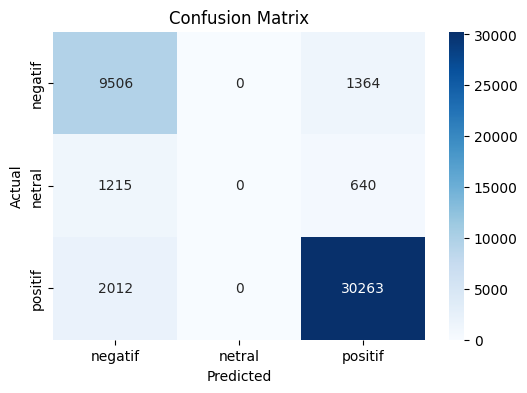

In [ ]:
# Evaluasi akurasi & laporan
y_pred = pipeline.predict(X_test)
print("\n=== Classification Report ===\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
user_input = input("Masukkan ulasan aplikasi Gojek: ").strip()

if user_input:
    cleaned_input = clean_text(user_input)
    prediction = pipeline.predict([cleaned_input])[0]
    probs = pipeline.predict_proba([cleaned_input])[0]

    print("\n===== HASIL PREDIKSI =====")
    print(f"Teks asli        : {user_input}")
    print(f"Prediksi sentimen: {prediction}")
    print("Probabilitas:")
    for label, prob in zip(pipeline.classes_, probs):
        print(f"  {label:<8}: {prob:.4f}")
else:
    print("Input kosong. Tidak dapat diproses.")


Masukkan ulasan aplikasi Gojek: bagus aplikasinya

===== HASIL PREDIKSI =====
Teks asli        : bagus aplikasinya
Prediksi sentimen: positif
Probabilitas:
  negatif : 0.0338
  netral  : 0.0046
  positif : 0.9616


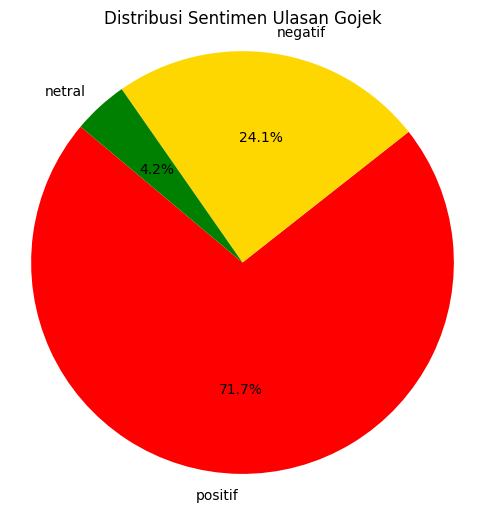

In [ ]:
# Hitung label
label_counts = df['label'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['red', 'gold', 'green'])
plt.axis('equal')
plt.title('Distribusi Sentimen Ulasan Gojek')
plt.show()


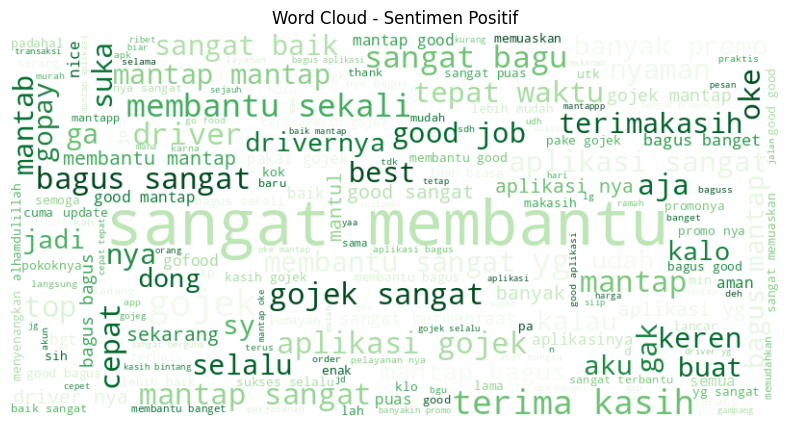

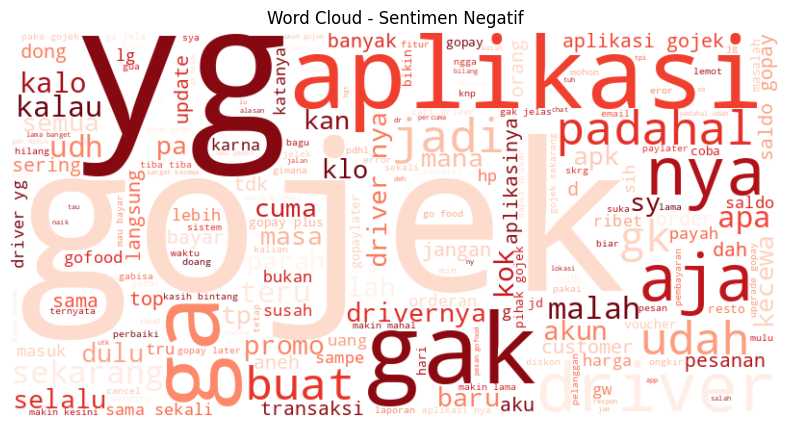

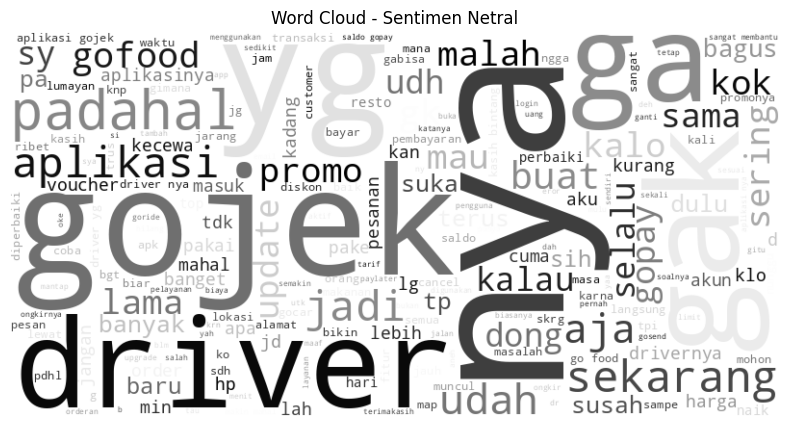

In [ ]:
# WordCloud positif
positif_text = ' '.join(df[df['label'] == 'positif']['clean_content'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positif_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Sentimen Positif")
plt.show()

# WordCloud negatif
negatif_text = ' '.join(df[df['label'] == 'negatif']['clean_content'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negatif_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Sentimen Negatif")
plt.show()

# WordCloud netral
netral_text = ' '.join(df[df['label'] == 'netral']['clean_content'])
wordcloud_net = WordCloud(width=800, height=400, background_color='white', colormap='gray').generate(netral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_net, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Sentimen Netral")
plt.show()

